In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
## plotting libraries
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
import pandas as pd
import numpy as np;
import scipy;
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [168]:
#read file
loan_df = pd.read_csv('./loan_cleaned.csv')

In [169]:
#option to display the maximum number of columsn in the dataframe
pd.set_option("display.max_columns", loan_df.shape[-1])



### DECISION TREE CLASSIFIER

### XY SPLIT

In [170]:
#split the X and Y values 
X = loan_df[['rate_of_interest','interest_rate_spread', 'dmy_EQUI']]
y = loan_df['status'].astype(int)

In [171]:
#split X and y into train and test respectively.
#test size is 20% of our data and random state is saved as 42, so we get always same 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=42)

### BALANCING DATA

In [172]:
#Upsampling using SMOTE
#this balances the data 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [173]:
## DECISION TREE MODEL

,Error_metric,Train,Test
0,Accuracy,1.0,0.999966
1,Precision,1.0,1.000000
2,Recall,1.0,0.999862


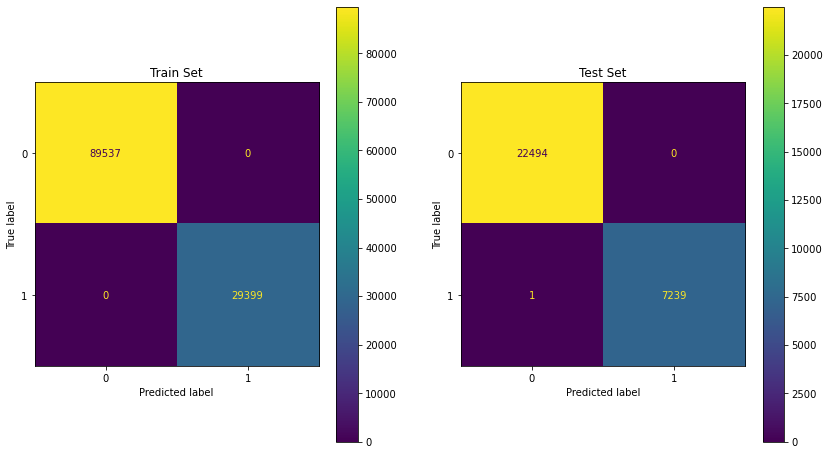

In [174]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [175]:
### Features Importances

In [176]:
#getting the coefficient of the features of importance 
model.feature_importances_

array([6.49405082e-01, 4.51796499e-05, 3.50549738e-01])

<BarContainer object of 3 artists>

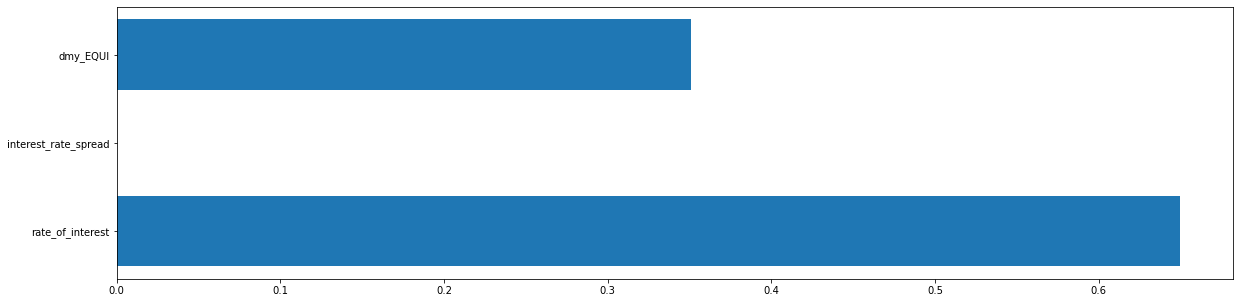

In [177]:
#plotting a bar plot to show which features are more important
plt.figure(figsize=(20,5))
plt.barh(X.columns,model.feature_importances_)

### CROSS VALIDATION

In [178]:
#cross validation score of the train set
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([1.        , 1.        , 1.        , 1.        , 0.99995796])

In [179]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


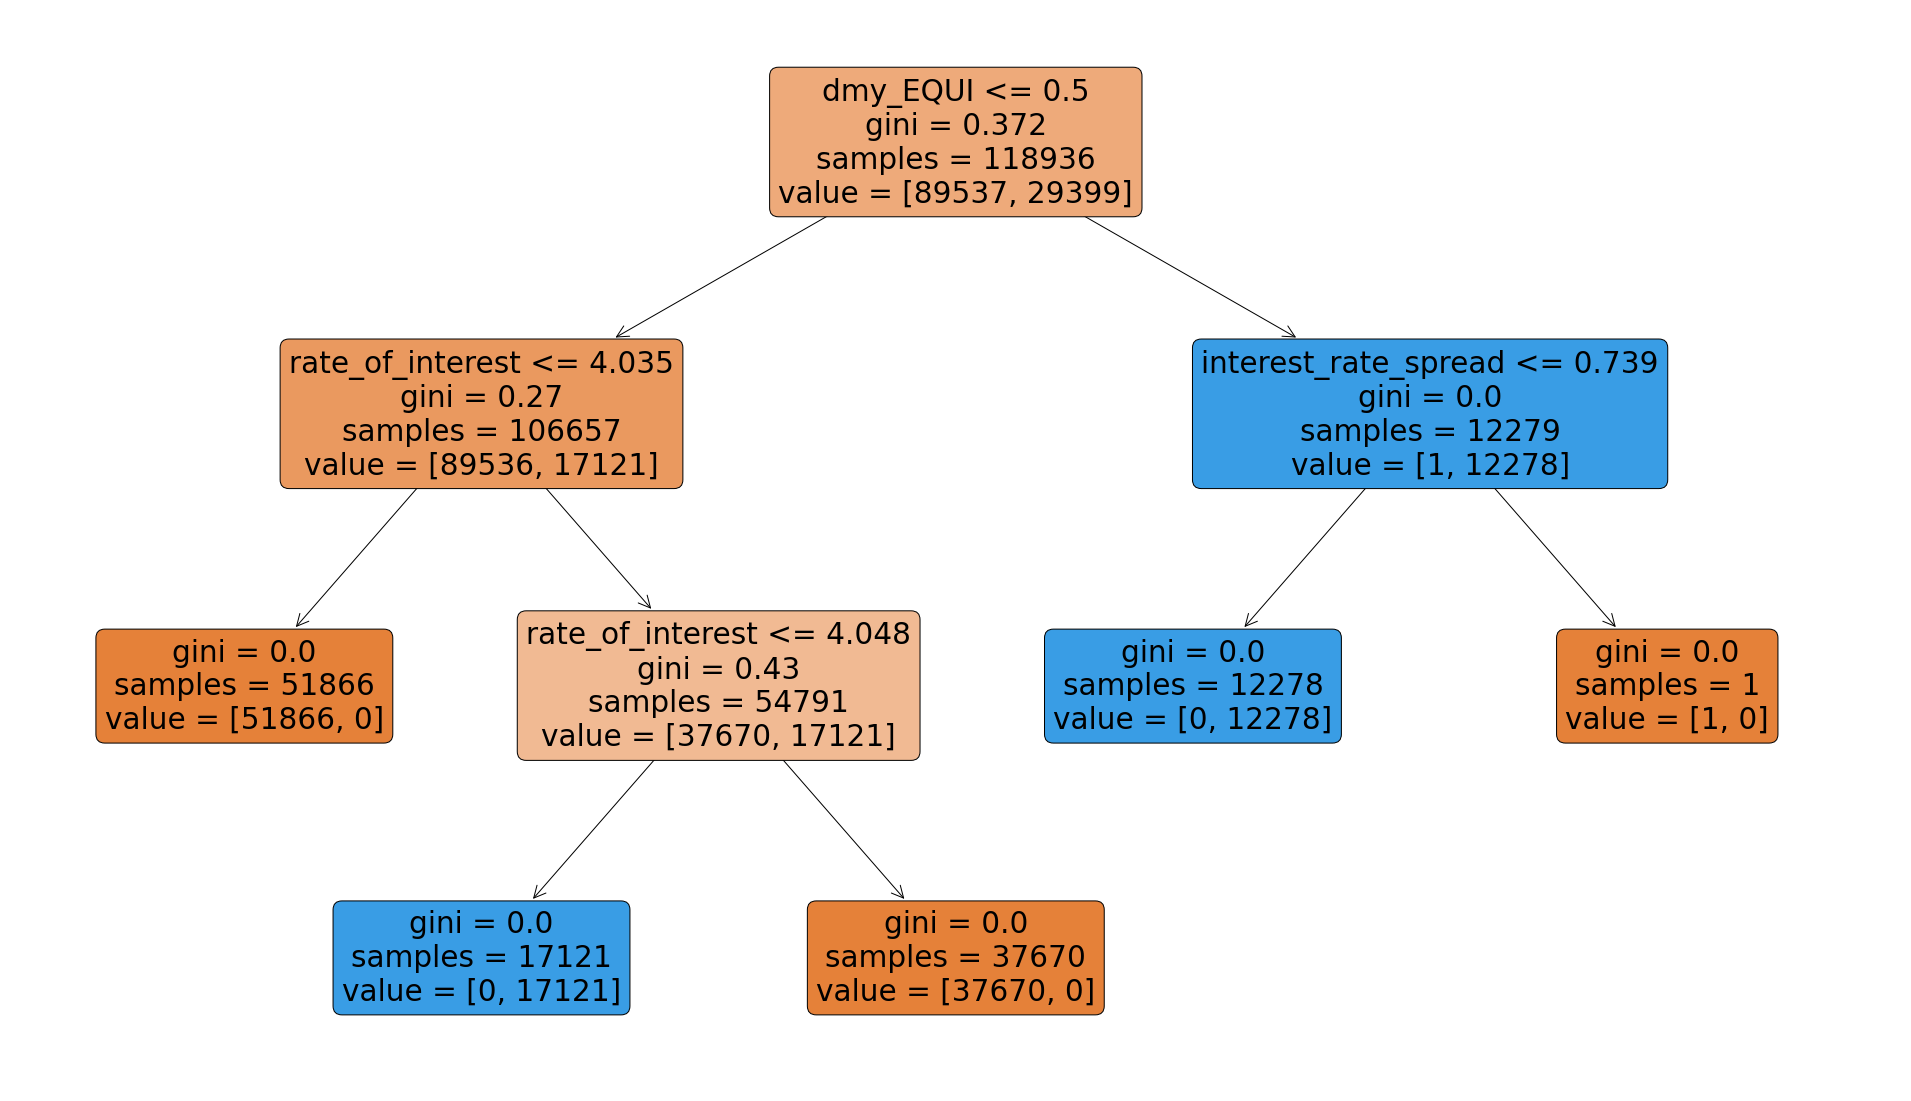

In [180]:
#visualizing the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [ ]:
###testing the accuracy of the model 

In [181]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [106]:
df = pd.DataFrame(list(zip(feature_names, model.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
0,rate_of_interest,0.649405
2,dmy_EQUI,0.350550
1,interest_rate_spread,0.000045


In [123]:
i_interest_rate = float(input("Please enter interest rate:" ))
i_interest_rate_spread = float(input("Please enter interest rate spread:" ))
i_credit_type = int(input("Please credit type:" ))

Please enter interest rate:3.125
Please enter interest rate spread:0.2571
Please credit type:0


In [124]:
new_data = pd.DataFrame(columns=["i_interest_rate", "i_interest_rate_spread", "i_credit_type"])
new_data.loc[0] = pd.Series({"i_interest_rate":i_interest_rate, "i_interest_rate_spread":i_interest_rate_spread, "i_credit_type":i_credit_type})

In [125]:
predict = model.predict(new_data)

In [126]:
predict[0]

0

In [136]:
#saving the model as a pickle
import pickle

#model = DecisionTreeClassifier()
with open("model.pickle", "wb") as f:
    pickle.dump(model,f)